In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%pwd

'/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/src/analysis/round4'

In [29]:
%cd ../../../data/round4/preprocessed

/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/data/round4/preprocessed


In [30]:
%ls

day0.csv            day3.csv            mid_price_day1.csv
day1.csv            macarons.csv        mid_price_day2.csv
day2.csv            mid_price_day0.csv  mid_price_day3.csv


In [34]:
df = pd.read_csv('macarons.csv')

In [35]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,mid_price,profit_and_loss,timestamp.1,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex
0,1,0,MAGNIFICENT_MACARONS,624.0,20.0,622.0,12.0,617.0,23.0,631,...,627.5,0.0,0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00
1,1,100,MAGNIFICENT_MACARONS,627.0,14.0,625.0,12.0,620.0,21.0,634,...,630.5,0.0,100,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00
2,1,200,MAGNIFICENT_MACARONS,627.0,10.0,625.0,15.0,620.0,21.0,634,...,630.5,0.0,200,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00
3,1,300,MAGNIFICENT_MACARONS,629.0,14.0,627.0,14.0,622.0,26.0,636,...,632.5,0.0,300,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01
4,1,400,MAGNIFICENT_MACARONS,628.0,18.0,625.0,16.0,620.0,26.0,635,...,631.5,0.0,400,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3,999500,MAGNIFICENT_MACARONS,794.0,12.0,792.0,16.0,786.0,22.0,802,...,798.0,0.0,2999500,797.5,799.0,1.7,9.5,-5.5,212.124918,54.95
29996,3,999600,MAGNIFICENT_MACARONS,798.0,10.0,796.0,13.0,790.0,29.0,806,...,802.0,0.0,2999600,801.5,803.0,1.7,9.5,-5.5,212.147650,54.96
29997,3,999700,MAGNIFICENT_MACARONS,801.0,20.0,798.0,16.0,792.0,20.0,809,...,805.0,0.0,2999700,804.0,805.5,1.7,9.5,-5.5,212.202086,54.97
29998,3,999800,MAGNIFICENT_MACARONS,795.0,14.0,793.0,13.0,787.0,22.0,803,...,799.0,0.0,2999800,798.5,800.0,1.7,9.5,-5.5,212.112734,54.98


In [71]:
df['mid_price_ma5'] = df['mid_price'].rolling(5).mean()
df['sugarPrice_ma5'] = df['sugarPrice'].rolling(5).mean()
df['mid_price_norm'] = df['mid_price'] / np.mean(df['mid_price']) - 1
df['sugarPrice_norm'] = df['sugarPrice'] / np.mean(df['sugarPrice']) - 1
df['mid_price_norm_ma5'] = df['mid_price_norm'].rolling(5).mean()
df['sugarPrice_norm_ma5'] = df['sugarPrice_norm'].rolling(5).mean()

In [75]:
#移动计算mid_price和sugarPrice的相关系数
n = 20
df['ms_corr'] = df['mid_price_ma5'].rolling(window=n).corr(df['sugarPrice_ma5'])
df.dropna(inplace=True)

<Axes: xlabel='ms_corr', ylabel='Count'>

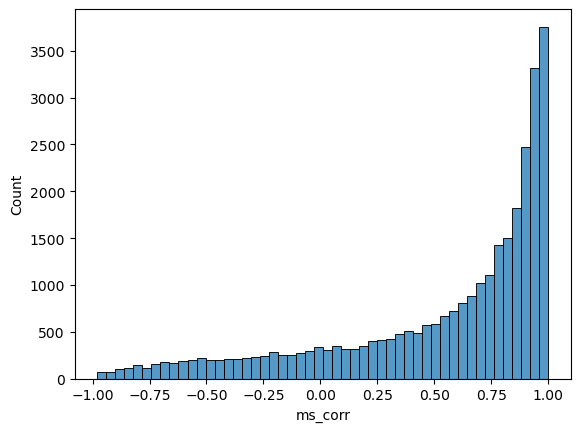

In [76]:
sns.histplot(df['ms_corr'])

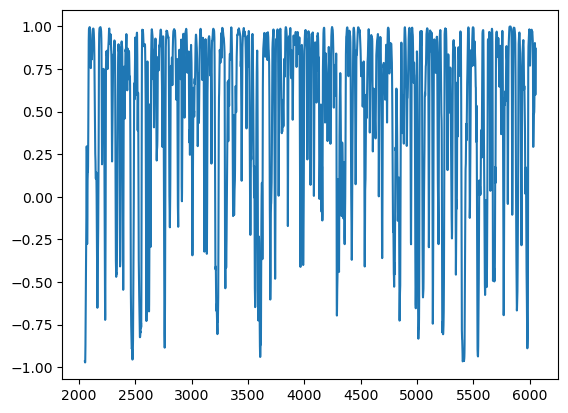

In [78]:
plt.plot(df['ms_corr'][2000:6000])

In [49]:
df['ms_corr_label'] = df['ms_corr'].apply(lambda x: 1 if x > 0.995 else 0)


label_1_df = df[df['ms_corr_label'] == 1]

# 找出所有范围的开始和结束时间戳

ranges = []
start = None

if start is None:
    start = row['timestamp']
elif row['timestamp'] != label_1_df.iloc[index-1]['timestamp'] + 100:  # 改为简单的数字+1
    ranges.append((start, label_1_df.iloc[index-1]['timestamp']))
    start = row['timestamp']
# 添加最后一个范围
if start is not None:
    ranges.append((start, label_1_df.iloc[-1]['timestamp']))

# 打印所有的范围
for start, end in ranges:
    print(f"范围开始: {start}, 范围结束: {end}")

范围开始: 3000, 范围结束: 833100


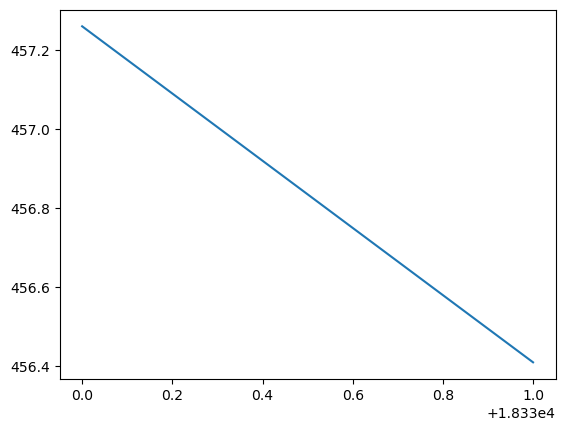

In [50]:
plt.plot(label_1_df['mid_price'] - label_1_df['sugarPrice'])

In [57]:
df['macaron_return'] = np.log(df['mid_price']).diff(3)
df['sugar_return'] = np.log(df['sugarPrice']).diff(3)

In [84]:
for CSI in range(30, 50):
    low_sunlight = df[df['sunlightIndex'] < CSI]
    correlation = low_sunlight['macaron_return'].corr(low_sunlight['sugar_return'])
    high_sunlight = df[df['sunlightIndex'] >= CSI]
    print(f"CSI: {CSI}, corr diff: {correlation - high_sunlight['macaron_return'].corr(high_sunlight['sugar_return'])}")


CSI: 30, corr diff: 0.04353484648021366
CSI: 31, corr diff: 0.029201960188688925
CSI: 32, corr diff: 0.021375781058554644
CSI: 33, corr diff: 0.018887835367840666
CSI: 34, corr diff: 0.020252697760919425
CSI: 35, corr diff: 0.013178451086590881
CSI: 36, corr diff: 0.00958417734744077
CSI: 37, corr diff: 0.01737039936712259
CSI: 38, corr diff: 0.0010551887717609176
CSI: 39, corr diff: 0.005027764903488219
CSI: 40, corr diff: 0.00963705995436881
CSI: 41, corr diff: 0.021654133630006678
CSI: 42, corr diff: 0.005738007532472222
CSI: 43, corr diff: 0.01216382192977028
CSI: 44, corr diff: 0.014129787714068254
CSI: 45, corr diff: 0.018742417412139778
CSI: 46, corr diff: 0.014166312379147339
CSI: 47, corr diff: 0.012365370755352156
CSI: 48, corr diff: 0.02023001393497903
CSI: 49, corr diff: 0.01985383237278271
